In [4]:
%pip install scikit-image

Looking in indexes: http://build-nexus.prod.crto.in/repository/pypi/simple
Note: you may need to restart the kernel to use updated packages.


In [5]:
from skimage import io
url = "https://s2.qwant.com/thumbr/0x380/e/d/9a175acc74327c049f11206bd2aa55bd94e0e1c87524d1b0ed168a03c87202/17-reasons-your-cat-is-giving-you-an-attitude-2-11887-1435674639-0_dblbig.jpg?u=https%3A%2F%2Fimg.buzzfeed.com%2Fbuzzfeed-static%2Fstatic%2F2015-06%2F30%2F10%2Fcampaign_images%2Fwebdr07%2F17-reasons-your-cat-is-giving-you-an-attitude-2-11887-1435674639-0_dblbig.jpg&q=0&b=1&p=0&a=1"
img = io.imread(url)

In [6]:
from IPython.display import Image, display

display(Image(url=url))

In [7]:
img.shape

(380, 572, 3)

In [8]:
import numpy as np

xs = np.random.randint(380, size=100)
ys = np.random.randint(572, size=100)

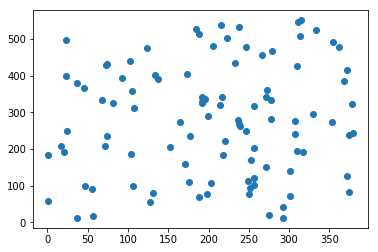

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(xs, ys)

In [10]:
from sklearn import cluster
from skimage.color import rgb2lab, lab2rgb
from skimage import data


rgb_img = img#data.coffee()
#hue_img = rgb2lab(rgb_img)




km = cluster.KMeans(n_clusters=10)
km.fit(rgb_img.reshape(-1, 3))

km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
#centers = np.concatenate([1. * np.ones((10, 1)), km.cluster_centers_], axis=1)
centers = km.cluster_centers_

centers

array([[ 33.99905087, 117.48936978,  58.93128322],
       [199.04891439, 197.30659158, 153.14692027],
       [  3.85437228,  56.01690938,  14.74539306],
       [157.12093941, 185.41582938, 113.97183012],
       [140.03314995, 127.4497558 , 101.72040083],
       [ 74.99843178,  61.71411396,  45.39367486],
       [110.49321344,  98.90794028,  76.15446216],
       [172.44648186, 152.09125177, 132.3052458 ],
       [ 26.78379047,  17.61957444,  10.19489608],
       [229.88279137, 219.45834707, 189.03060484]])

In [ ]:
from matplotlib import pyplot as plt



color_base = np.ones((10, 10, 3))

for color in centers:
    real_color = np.round((color * color_base) / 255., 2) 
    plt.figure()
    plt.imshow(real_color, interpolation='nearest')
    plt.show()
    


In [ ]:
pos_km = cluster.KMeans(n_clusters=len(xs))

pos_km.cluster_centers_ = np.concatenate([xs.reshape(-1, 1), ys.reshape(-1, 1)], axis=1)

all_points = [np.array([i, j]) for i in range(img.shape[0]) for j in range(img.shape[1])]
cluster_attachment = pos_km.predict(all_points)

In [ ]:
cluster_attachment

In [ ]:
cluster_img = cluster_attachment.reshape(img.shape[0:2])

plt.figure()
plt.imshow(cluster_img, interpolation='nearest')
plt.show()

In [ ]:
from collections import defaultdict
mean_colors = defaultdict(list)

for pos, cluster_idx in zip(all_points, cluster_attachment):
    mean_colors[cluster_idx].append(img[pos[0], pos[1], :].reshape(1, -1))


In [ ]:
color_base = np.ones((10, 10, 3))

color_per_zone = dict()

for idx, color_array in mean_colors.items():
    mean_color = np.mean(np.concatenate(color_array, axis=0), axis=0)
    
    color_per_zone[idx] = mean_color
    
real_color = np.round(color_per_zone[7] * color_base / 255., 2)
plt.figure()
plt.imshow(real_color, interpolation='nearest')
plt.show()

In [ ]:
clustered_img = np.zeros(img.shape)

for pos, cluster_idx in zip(all_points, cluster_attachment):
    clustered_img[pos[0], pos[1], :] = color_per_zone[cluster_idx]
    
clustered_img = np.round(clustered_img / 255., 2)

plt.figure()
plt.imshow(clustered_img, interpolation='nearest')
plt.show()

# Everything in one line 

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
import time
import numpy as np
from sklearn import cluster
from skimage import io
from skimage.color import rgb2lab, lab2rgb
from skimage import data


def cluster_colors(rgb_img, n_clusters=10, color="rgb"):
    km = cluster.KMeans(n_clusters=n_clusters)
    img = rgb_img
    km.fit(img.reshape(-1, 3))
    
    return km

def build_spatial_clustering(img, xs, ys):
    pos_km = cluster.KMeans(n_clusters=len(xs))
    pos_km.cluster_centers_ = np.concatenate([ys.reshape(-1, 1), xs.reshape(-1, 1)], axis=1)
    all_points = [np.array([y, x]) for x in range(img.shape[1]) for y in range(img.shape[0])]
    cluster_attachment = pos_km.predict(all_points)
    
    return all_points, cluster_attachment

def get_cluster_mean_colors(img, all_points, cluster_attachment, n_points):
    mean_colors = list()
    for i in range(n_points):
        mean_colors.append(list())

    for pos, cluster_idx in zip(all_points, cluster_attachment):
        mean_colors[cluster_idx].append(img[pos[0], pos[1], :].reshape(1, -1))
        
    return mean_colors

def build_simplified_img(img, all_points, cluster_attachment, color_per_zone, km):
    clustered_img = np.zeros(img.shape)
    
    print(max(cluster_attachment))
    print(len(color_per_zone))
    
    all_colors = np.array([color_per_zone[cluster_idx] for cluster_idx in cluster_attachment])
    color_indexes = km.predict(all_colors)
    
    for idx, (pos, cluster_idx) in enumerate(zip(all_points, cluster_attachment)):
        clustered_img[pos[0], pos[1], :] = km.cluster_centers_[color_indexes[idx]]

    clustered_img = np.round(clustered_img / 255., 2)
    return clustered_img



def simplify_img(img, n_points, n_colors):
    # Image shape
    tt = time.time()
    h, w, c = img.shape
    print(img.shape)
    
    # Find main color of the image 
    km = cluster_colors(img, n_colors)
    
    # Create the local sampling
    xs = np.random.randint(w, size=n_points)
    ys = np.random.randint(h, size=n_points)
    all_points, cluster_attachment = build_spatial_clustering(img, xs, ys)
    
    # Get mean color per cluster
    mean_colors = get_cluster_mean_colors(img, all_points, cluster_attachment, n_points)
    
    # Get the mean color in each spatial zone
    color_per_zone = list()
    for color_array in mean_colors:
        mean_color = np.mean(np.concatenate(color_array, axis=0), axis=0) if len(color_array) > 0 else np.array([0, 0, 0])
        color_per_zone.append(mean_color)
    
    print(time.time() - tt)
    # Replace mean color per zone by the simplified color
    final = build_simplified_img(img, all_points, cluster_attachment, color_per_zone, km)
    print(time.time() - tt)
    return final 
    
def show_result(img):
    clustered_img = simplify_img(img, n_points, n_colors)

    plt.figure()
    plt.imshow(clustered_img, interpolation='nearest')

    plt.figure()
    plt.imshow(img, interpolation='nearest')

    plt.show()


(380, 572, 3)
24.819795846939087
999
1000
25.330010890960693


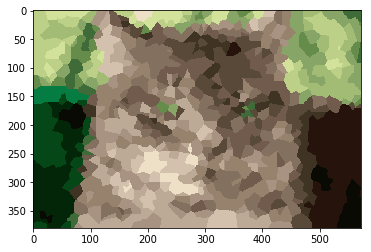

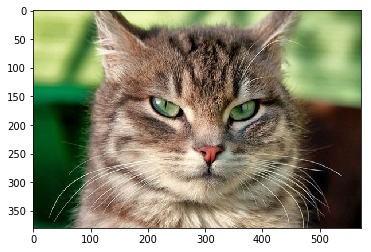

In [13]:
n_points = 1000
n_colors = 20


def show_result(img):
    clustered_img = simplify_img(img, n_points, n_colors)

    plt.figure()
    plt.imshow(clustered_img, interpolation='nearest')

    plt.figure()
    plt.imshow(img, interpolation='nearest')

    plt.show()
    
url = "https://s2.qwant.com/thumbr/0x380/e/d/9a175acc74327c049f11206bd2aa55bd94e0e1c87524d1b0ed168a03c87202/17-reasons-your-cat-is-giving-you-an-attitude-2-11887-1435674639-0_dblbig.jpg?u=https%3A%2F%2Fimg.buzzfeed.com%2Fbuzzfeed-static%2Fstatic%2F2015-06%2F30%2F10%2Fcampaign_images%2Fwebdr07%2F17-reasons-your-cat-is-giving-you-an-attitude-2-11887-1435674639-0_dblbig.jpg&q=0&b=1&p=0&a=1"
img = io.imread(url)
show_result(img)

In [14]:

img = io.imread("https://s2.qwant.com/thumbr/0x380/5/c/d97d2872682a0c97c8da8cd2163c46052c200044767048eb6923afb61e8383/GettyImages-845772448-5c9156e346e0fb0001f8d12a.jpg?u=https%3A%2F%2Fwww.tripsavvy.com%2Fthmb%2F8mcmjIcuVYUSzzIGXuUHaoP60nE%3D%2F960x0%2Ffilters%3Ano_upscale%28%29%3Amax_bytes%28150000%29%3Astrip_icc%28%29%2FGettyImages-845772448-5c9156e346e0fb0001f8d12a.jpg&q=0&b=1&p=0&a=1")

n_points = 1000
n_colors = 20
show_result(img)

HTTPError: HTTP Error 504: Gateway Time-out

In [ ]:

img = io.imread("https://s1.qwant.com/thumbr/0x380/b/f/f261144d89b4c705fc003738ad4de4917a25cf716471b6be85ab2c7e616aa1/facial-dry-brushing-promojpg.jpg?u=https%3A%2F%2Ffashionista.com%2F.image%2Ft_share%2FMTQyMzI0NTY0NjcwNTU1OTg5%2Ffacial-dry-brushing-promojpg.jpg&q=0&b=1&p=0&a=1")
n_points = 1000
n_colors = 20
show_result(img)

In [ ]:
url = "https://s1.qwant.com/thumbr/0x380/2/b/825b7cfdd7fe089e8bf40214f2a23820aa136a0f77a6497cfbd132649c16ba/fo2m9ipgvt901.jpg?u=https%3A%2F%2Fi.redd.it%2Ffo2m9ipgvt901.jpg&q=0&b=1&p=0&a=1"
img = io.imread(url)
n_points = 1000
n_colors = 20
show_result(img)

# To SVG with Voronoi cells

In [16]:
pointA = np.array([0, 1])
pointB = np.array([1, 2])

equation = get_line_equation(pointA, pointB)
print("my equ", equation)


def get_pts_from_equ(equation):
    rez = [f(equation, x) for x in range(0, 500)]
    xs = [r[0] for r in rez]
    ys = [r[1] for r in rez]
    return xs, ys

# ax +by + c = 0
# y = (ax + c) / -b

f = lambda equation, x: [x, (equation[0] * x + equation[2]) / -equation[1]] if abs(equation[1]) > 1e-6 else (-equation[2] / equation[0], x)

my equ (1.0, 1.0, -2.0)


(1.0, -2.0, 2.5)


(-5, 5)

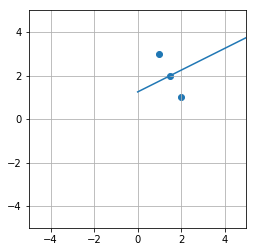

In [17]:
pointA = np.array([1, 3])
pointB = np.array([2, 1])


equation = get_line_equation(pointA, pointB)
print(equation)

xs, ys = get_pts_from_equ(equation)

plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xs, ys)
plt.scatter([pointA[0], pointB[0], (pointA[0] + pointB[0]) / 2], [pointA[1], pointB[1], (pointA[1] + pointB[1]) / 2])
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [106]:
from collections import defaultdict

xs = np.random.randint(380, size=5)
ys = np.random.randint(572, size=5)

points = [np.array([x, y]) for x, y in zip(xs, ys)]

equations = defaultdict(dict)

for i in range(len(points)):
    for j in range(i):
        equations[i][j] = (get_line_equation(points[i], points[j]), points[i], points[j])
        


defaultdict(dict,
            {1: {0: ((1.0, 0.9787234042553191, -256.6063829787234),
               array([ 6, 21]),
               array([241, 251]))},
             2: {0: ((1.0, 2.619047619047619, -1063.4285714285716),
               array([283, 361]),
               array([241, 251])),
              1: ((1.0, 1.227436823104693, -378.94043321299637),
               array([283, 361]),
               array([ 6, 21]))},
             3: {0: ((1.0, -7.444444444444445, 2389.222222222222),
               array([214, 452]),
               array([241, 251])),
              1: ((1.0, 2.0721153846153846, -600.0552884615385),
               array([214, 452]),
               array([ 6, 21])),
              2: ((1.0, -1.318840579710145, 287.608695652174),
               array([214, 452]),
               array([283, 361]))},
             4: {0: ((1.0, 75.0, -16253.0),
               array([240, 176]),
               array([241, 251])),
              1: ((1.0, 0.6623931623931624, -188.2457264957265

(0, 572)

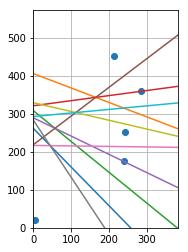

In [107]:

def get_pts_from_equ(equation):
    rez = [f(equation, x) for x in range(0, 500)]
    xs = [r[0] for r in rez]
    ys = [r[1] for r in rez]
    return xs, ys


plt.figure()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(*get_pts_from_equ(equations[1][0][0]))
plt.plot(*get_pts_from_equ(equations[2][0][0]))
plt.plot(*get_pts_from_equ(equations[2][1][0]))
plt.plot(*get_pts_from_equ(equations[3][0][0]))
plt.plot(*get_pts_from_equ(equations[3][1][0]))
plt.plot(*get_pts_from_equ(equations[3][2][0]))
plt.plot(*get_pts_from_equ(equations[4][0][0]))
plt.plot(*get_pts_from_equ(equations[4][1][0]))
plt.plot(*get_pts_from_equ(equations[4][2][0]))
plt.plot(*get_pts_from_equ(equations[4][3][0]))
plt.scatter(xs, ys)


plt.xlim(0, 380)
plt.ylim(0, 572)

# Next steps

### Get the boundaries

In [108]:
line_equ, A, B = equations[1][0][0]
C = 0.5 * (A + B)

In [3]:
def get_line_equation(pointA, pointB):
    pointC = (pointA + pointB) / 2
    # We order as ay + bx + c = 0
    line_eq = np.array([-(pointB[1] - pointA[1]) / (pointB[0] - pointA[0]), 1]) if abs(pointB[0] - pointA[0]) > 1e-6 else np.array([1, 0])
    orthogonal = np.cross(np.array([line_eq[0], line_eq[1], 0]), [0, 0, 1])
    # numpy orders as x, y
    c = -np.dot(orthogonal[:2], pointC)
    return (orthogonal[0], orthogonal[1], c)
    
    
class FindBoundaries:
    
    def __init__(self, centers, i, j):
        self.centers = centers
        self.i = i
        self.j = j 
        
    @classmethod
    def is_closer_i_j(cls, my_point, centers, i, j):
        d = np.linalg.norm((centers[i] - my_point), 2)
        return all([np.linalg.norm(my_point - centers[k], 2) >= d 
                    for k in range(len(centers)) if k != i and k!= j])

    def get_points(self, line_equ, x_max, y_max):
        """
        1. find maximum segments point
        2. If middle point is not closer to i and j, return 
        3. Find by dichotomy the max point closer to i and j than other centers
        4. Return these two points -> we found the segments
        
        """
        # 1. find maximum segments point
        # Equation is ax + by + c = 0
        # y = -a/b x - c/b
        # solve y=0, y=y_max, x=0, x=x_max
        points = [
            [0, -line_equ[2] / line_equ[1]], 
            [x_max - 1, -line_equ[0] / line_equ[1] * (x_max - 1) - line_equ[2] / line_equ[1]],
            [-line_equ[2] / line_equ[0], 0],
            [-line_equ[1] / line_equ[0] * (y_max - 1) - line_equ[2] / line_equ[0], y_max - 1],
        ]
        points = [p for p in points if 0 <= p[0] < x_max and 0 <= p[1] < y_max]
        assert(len(points) == 2)
        exterme_left = np.array(points[0] if points[0][0] < points[1][0] else points[1])
        exterme_right = np.array(points[0] if points[0][0] > points[1][0] else points[1])

        # 3. check all points one by one
        point_belonging = dict()
        #print(exterme_left, exterme_right)
        for point in bresenham(int(exterme_left[0]), int(exterme_left[1]), 
                               int(exterme_right[0]), int(exterme_right[1])):
            if self.is_closer_i_j(point, self.centers, self.i, self.j):
                point_belonging[point] = (i, j)

        # 4. Win
        return point_belonging
    
    def find_left_right_wrong():
        left_point = None
        right_point = None
        C = 0.5 * (self.centers[self.i] + self.centers[self.j])
        if not self.is_closer_i_j(C, self.centers, self.i, self.j):
            return (left_point, right_point)

        # 3. Dichotomy to find left and right
        if self.is_closer_i_j(exterme_left, self.centers, self.i, self.j):
            left_point = exterme_left
        else:
            left_point = self.recurring(min_point=exterme_left,max_point=C)
            
        if self.is_closer_i_j(exterme_right, self.centers, self.i, self.j):
            right_point = exterme_right
        else:
            right_point = self.recurring(min_point=C,max_point=exterme_right)
            
        return left_point, right_point

    def recurring(self, min_point, max_point):
        middle = np.rint(0.5 * (min_point + max_point))
        if np.all(min_point == middle) or np.all(middle == max_point):
            return middle
        else:
            if self.is_closer_i_j(middle, self.centers, self.i, self.j):
                return self.recurring(min_point, middle)
            else:
                return self.recurring(middle, max_point)


NameError: name 'x_max' is not defined

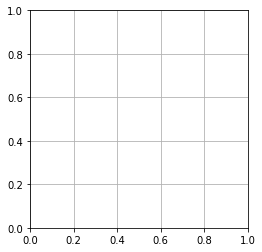

In [168]:
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

for i in range(5):
    for j in range(i):
        plot(points, equations, i, j, x_max=360, y_max=500)
        
plt.scatter(xs, ys)


plt.xlim(0, 380)
plt.ylim(0, 572)

In [53]:
np.array([2, 3]) == np.array([1, 1])

array([False, False])

Looking in indexes: http://build-nexus.prod.crto.in/repository/pypi/simple
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
241 251 6 21


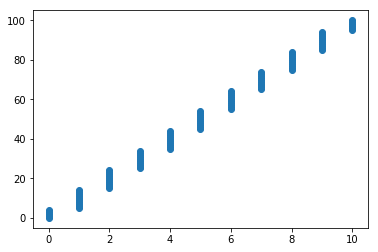

In [141]:

print(xs[0], ys[0], xs[1], ys[1])
plt.scatter(*zip(zip(*list(bresenham(0, 0, 10, 100)))))

In [119]:
list(bresenham(xs[0], ys[0], xs[1], ys[1]))[0]

(241, 251)

In [59]:
def get_line_equation(pointA, pointB):
    pointC = (pointA + pointB) / 2
    # We order as ay + bx + c = 0
    line_eq = np.array([-(pointB[1] - pointA[1]) / (pointB[0] - pointA[0]), 1]) if abs(pointB[0] - pointA[0]) > 1e-6 else np.array([1, 0])
    orthogonal = np.cross(np.array([line_eq[0], line_eq[1], 0]), [0, 0, 1])
    # numpy orders as x, y
    c = -np.dot(orthogonal[:2], pointC)
    return (orthogonal[0], orthogonal[1], c)
    
    
class FindBoundaries:
    
    def __init__(self, centers, i, j):
        self.centers = centers
        self.i = i
        self.j = j 
        
    @classmethod
    def is_closer_i_j(cls, my_point, centers, i, j):
        d = np.linalg.norm((centers[i] - my_point), 2)
        return all([np.linalg.norm(my_point - centers[k], 2) >= d 
                    for k in range(len(centers)) if k != i and k!= j])

    def get_points(self, line_equ, x_max, y_max):
        """
        1. find maximum segments point
        2. If middle point is not closer to i and j, return 
        3. Find by dichotomy the max point closer to i and j than other centers
        4. Return these two points -> we found the segments
        
        """
        # 1. find maximum segments point
        # Equation is ax + by + c = 0
        # y = -a/b x - c/b
        # solve y=0, y=y_max, x=0, x=x_max
        points = [
            np.array([0, -line_equ[2] / line_equ[1]]), 
            np.array([x_max - 1, -line_equ[0] / line_equ[1] * (x_max - 1) - line_equ[2] / line_equ[1]]),
            np.array([-line_equ[2] / line_equ[0], 0]),
            np.array([-line_equ[1] / line_equ[0] * (y_max - 1) - line_equ[2] / line_equ[0], y_max - 1]),
        ]
        points = [p for p in points if 0 <= p[0] < x_max and 0 <= p[1] < y_max]
        if(len(points) != 2):
            # It can happen, then two points are the same, take the two with the largest distance
            p = points
            points = [p[0], p[1]] if np.linalg.norm(p[0] - p[1], 2) > np.linalg.norm(p[0] - p[2], 2) else [p[0], p[2]]
            print(">>>>> ", points)
            #raise Exception("Not two points :()")
        exterme_left = points[0] if points[0][0] < points[1][0] else points[1]
        exterme_right = points[0] if points[0][0] > points[1][0] else points[1]

        # 3. check all points one by one
        point_belonging = dict()
        #print(exterme_left, exterme_right)
        for point in bresenham(int(exterme_left[0]), int(exterme_left[1]), 
                               int(exterme_right[0]), int(exterme_right[1])):
            if self.is_closer_i_j(point, self.centers, self.i, self.j):
                point_belonging[point] = (self.i, self.j)

        # 4. Win
        return point_belonging
    



Looking in indexes: http://build-nexus.prod.crto.in/repository/pypi/simple
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Computing line equations
Plotting segments
>>>>>  [array([   0.        , 2999.52523364]), array([1999.        ,  469.94953271])]
>>>>>  [array([1.99900000e+03, 1.91891892e+00]), array([ 520.44, 2999.  ])]


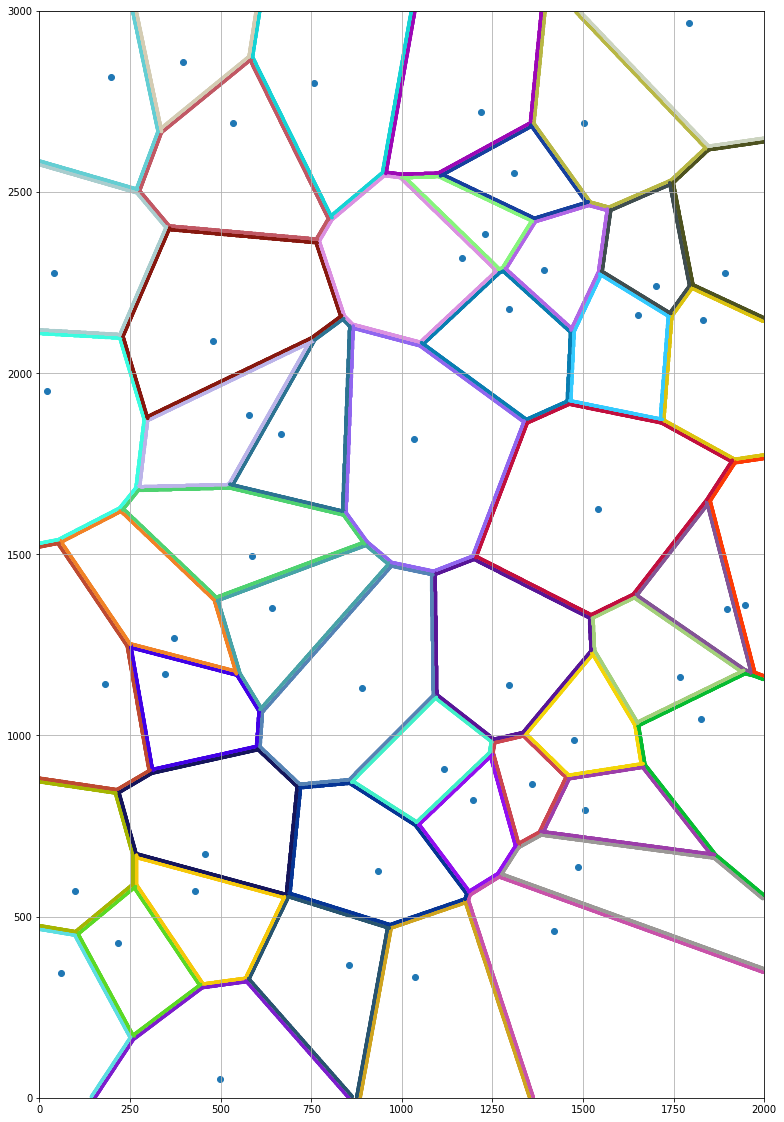

In [127]:
%pip install bresenham
%matplotlib inline


from collections import defaultdict
import random
from matplotlib import pyplot as plt

import time
import numpy as np
from sklearn import cluster
from skimage import io
from skimage.color import rgb2lab, lab2rgb
from skimage import data


from bresenham import bresenham


def plot(points, equations, i, j, x_max, y_max, center_to_color, line_width = 5):
    """
    Plot the point on the line that are closer to centers i and j
    """
    # 1. Find the points that verify the condiftion
    bb = FindBoundaries(points, i, j)
    segment_to_centers = bb.get_points(equations[i][j], x_max, y_max)
    segment = list(segment_to_centers.keys())
    
    if len(segment) == 0:
        return
    
    # 2. compute the orthogonal, needed to plot two line with the two colors
    i, j = segment_to_centers[segment[0]]
    line_eq = np.array(segment[-1]) - np.array(segment[0])
    orthogonal = np.cross(np.array([line_eq[0], line_eq[1], 0]), [0, 0, 1])
    direction = np.array(orthogonal[0:2]) 
    direction = -direction / np.linalg.norm(direction) * line_width / 2
    
    # 3. Plot the two lines, separated by line_width
    xx, yy = [p[0] - direction[0] for p in segment], [p[1] - direction[1] for p in segment]
    # lw for line but s for point size
    k = i if points[i][1] < points[j][1] else j 
    plt.scatter(xx, yy, c=[center_to_color[k]] * len(xx),  s=line_width)
    
    xx, yy = [p[0] + direction[0] for p in segment], [p[1] + direction[1] for p in segment]
    # lw for line but s for point size
    k = i if points[i][1] > points[j][1] else j 
    plt.scatter(xx, yy, c=[center_to_color[k]] * len(xx),  s=line_width)


def plot_cell_boundaries(points_, x_max, y_max, center_to_color, ax, line_width=5):
    """
    For all center pairs, compute the equation
    
    For all equations, find the point that are indeed closer to their two centers
    and plot these points 
    """
    equations = defaultdict(dict)

    print("Computing line equations")
    for i in range(len(points_)):
        for j in range(i):
            equations[i][j] = get_line_equation(points_[i], points_[j])


    #ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

    print("Plotting segments")
    for i in range(len(points_)):
        for j in range(i):
            plot(points_, equations, i, j, x_max, y_max, center_to_color, line_width=line_width)

    xs = [p[0] for p in points_]
    ys = [p[1] for p in points_]
            
    ax.scatter(xs, ys)
    ax.set(xlim=(0, x_max), ylim=(0, y_max))
    



x_max = 2000
y_max = 3000
n_points = 50
plt.rcParams["figure.figsize"] = (20,20)

center_to_color = {i: (random.random(), random.random(), random.random(), 1) 
                   for i in range(n_points)}
 
xs = np.random.randint(x_max, size=n_points)
ys = np.random.randint(y_max, size=n_points)
my_points = [np.array([x, y]) for x, y in zip(xs, ys)]

fig, ax = plt.subplots(frameon=False)
plot_cell_boundaries(my_points, x_max, y_max, center_to_color, ax, line_width=5)

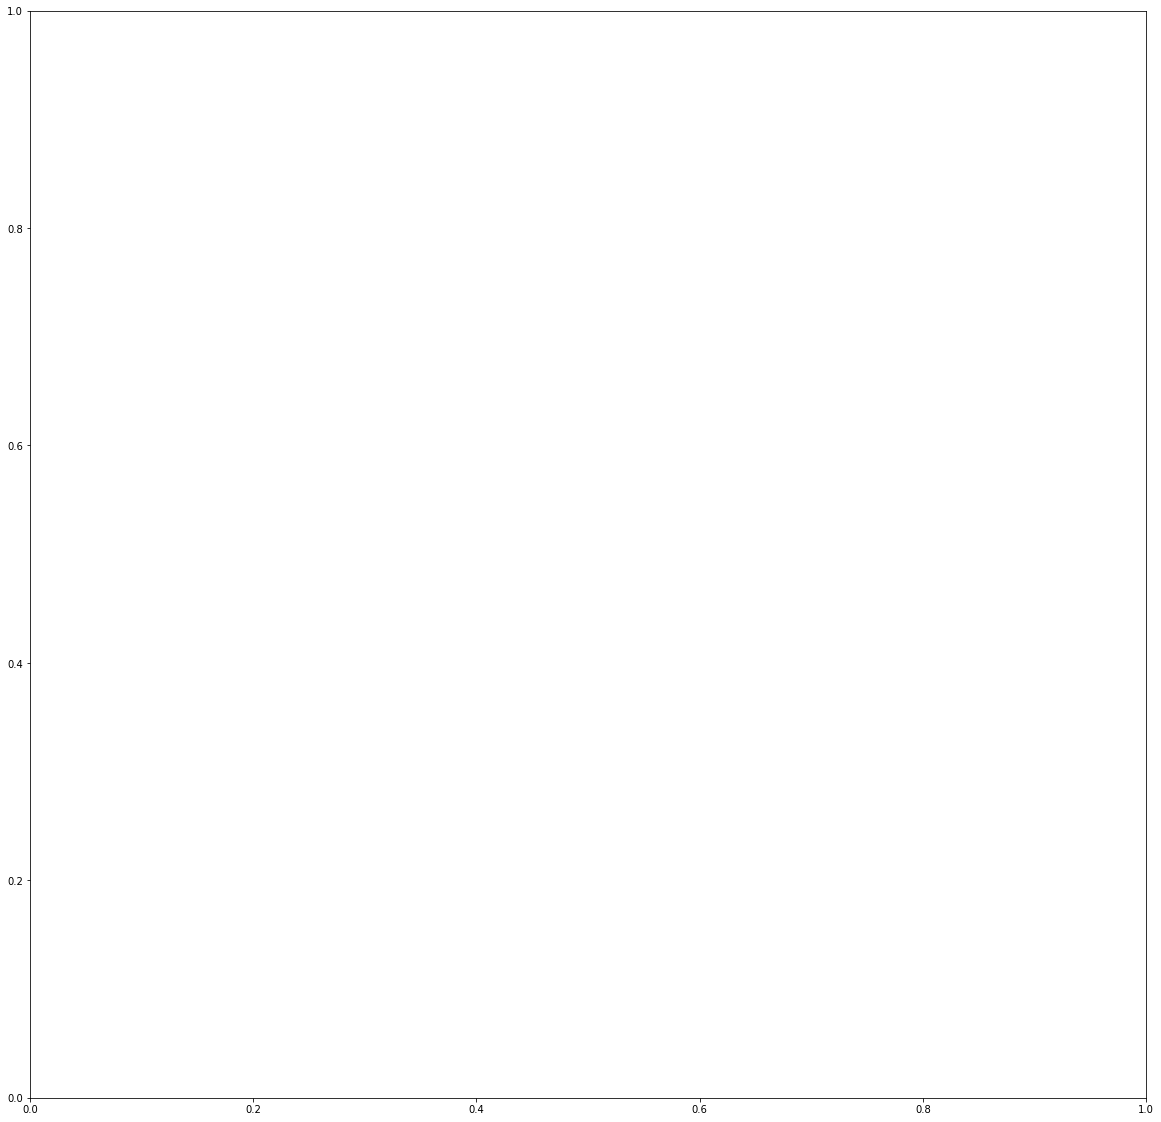

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline
import time
import numpy as np
from sklearn import cluster
from skimage import io
from skimage.color import rgb2lab, lab2rgb
from skimage import data


def cluster_colors(rgb_img, n_clusters=10, color="rgb"):
    km = cluster.KMeans(n_clusters=n_clusters)
    img = rgb_img
    km.fit(img.reshape(-1, 3))
    
    return km

def build_spatial_clustering(img, xs, ys):
    pos_km = cluster.KMeans(n_clusters=len(xs))
    pos_km.cluster_centers_ = np.concatenate([ys.reshape(-1, 1), xs.reshape(-1, 1)], axis=1)
    all_points = [np.array([y, x]) for x in range(img.shape[1]) for y in range(img.shape[0])]
    cluster_attachment = pos_km.predict(all_points)
    
    return all_points, cluster_attachment

def get_cluster_mean_colors(img, all_points, cluster_attachment, n_points):
    mean_colors = list()
    for i in range(n_points):
        mean_colors.append(list())

    for pos, cluster_idx in zip(all_points, cluster_attachment):
        mean_colors[cluster_idx].append(img[pos[0], pos[1], :].reshape(1, -1))
        
    return mean_colors

def build_simplified_img(img, all_points, cluster_attachment, color_per_zone, km):
    clustered_img = np.zeros(img.shape)
    
    print(max(cluster_attachment))
    print(len(color_per_zone))
    
    all_colors = np.array([color_per_zone[cluster_idx] for cluster_idx in cluster_attachment])
    color_indexes = km.predict(all_colors)
    
    for idx, (pos, cluster_idx) in enumerate(zip(all_points, cluster_attachment)):
        clustered_img[pos[0], pos[1], :] = km.cluster_centers_[color_indexes[idx]]

    clustered_img = np.round(clustered_img / 255., 2)
    return clustered_img



def simplify_img(img, n_points, n_colors):
    # Image shape
    tt = time.time()
    h, w, c = img.shape
    print(img.shape)
    
    # Find main color of the image 
    km = cluster_colors(img, n_colors)
    
    # Create the local sampling
    xs = np.random.randint(w, size=n_points)
    ys = np.random.randint(h, size=n_points)
    all_points, cluster_attachment = build_spatial_clustering(img, xs, ys)
    
    # Get mean color per cluster
    mean_colors = get_cluster_mean_colors(img, all_points, cluster_attachment, n_points)
    
    # Get the mean color in each spatial zone
    color_per_zone = list()
    for color_array in mean_colors:
        mean_color = np.mean(np.concatenate(color_array, axis=0), axis=0) if len(color_array) > 0 else np.array([0, 0, 0])
        color_per_zone.append(mean_color)
    
    print(time.time() - tt)
    # Replace mean color per zone by the simplified color
    final = build_simplified_img(img, all_points, cluster_attachment, color_per_zone, km)
    print(time.time() - tt)
    return final, [np.array([x, y]) for x, y in zip(xs, ys)], color_per_zone
    
def show_result(img):
    clustered_img, all_points, color_per_zone = simplify_img(img, n_points, n_colors)

    plt.figure()
    plt.imshow(clustered_img, interpolation='nearest')

    plt.figure()
    plt.imshow(img, interpolation='nearest')

    plt.show()
    
    return all_points, color_per_zone



(900, 1200, 3)
163.68647503852844
19
20
166.0862250328064


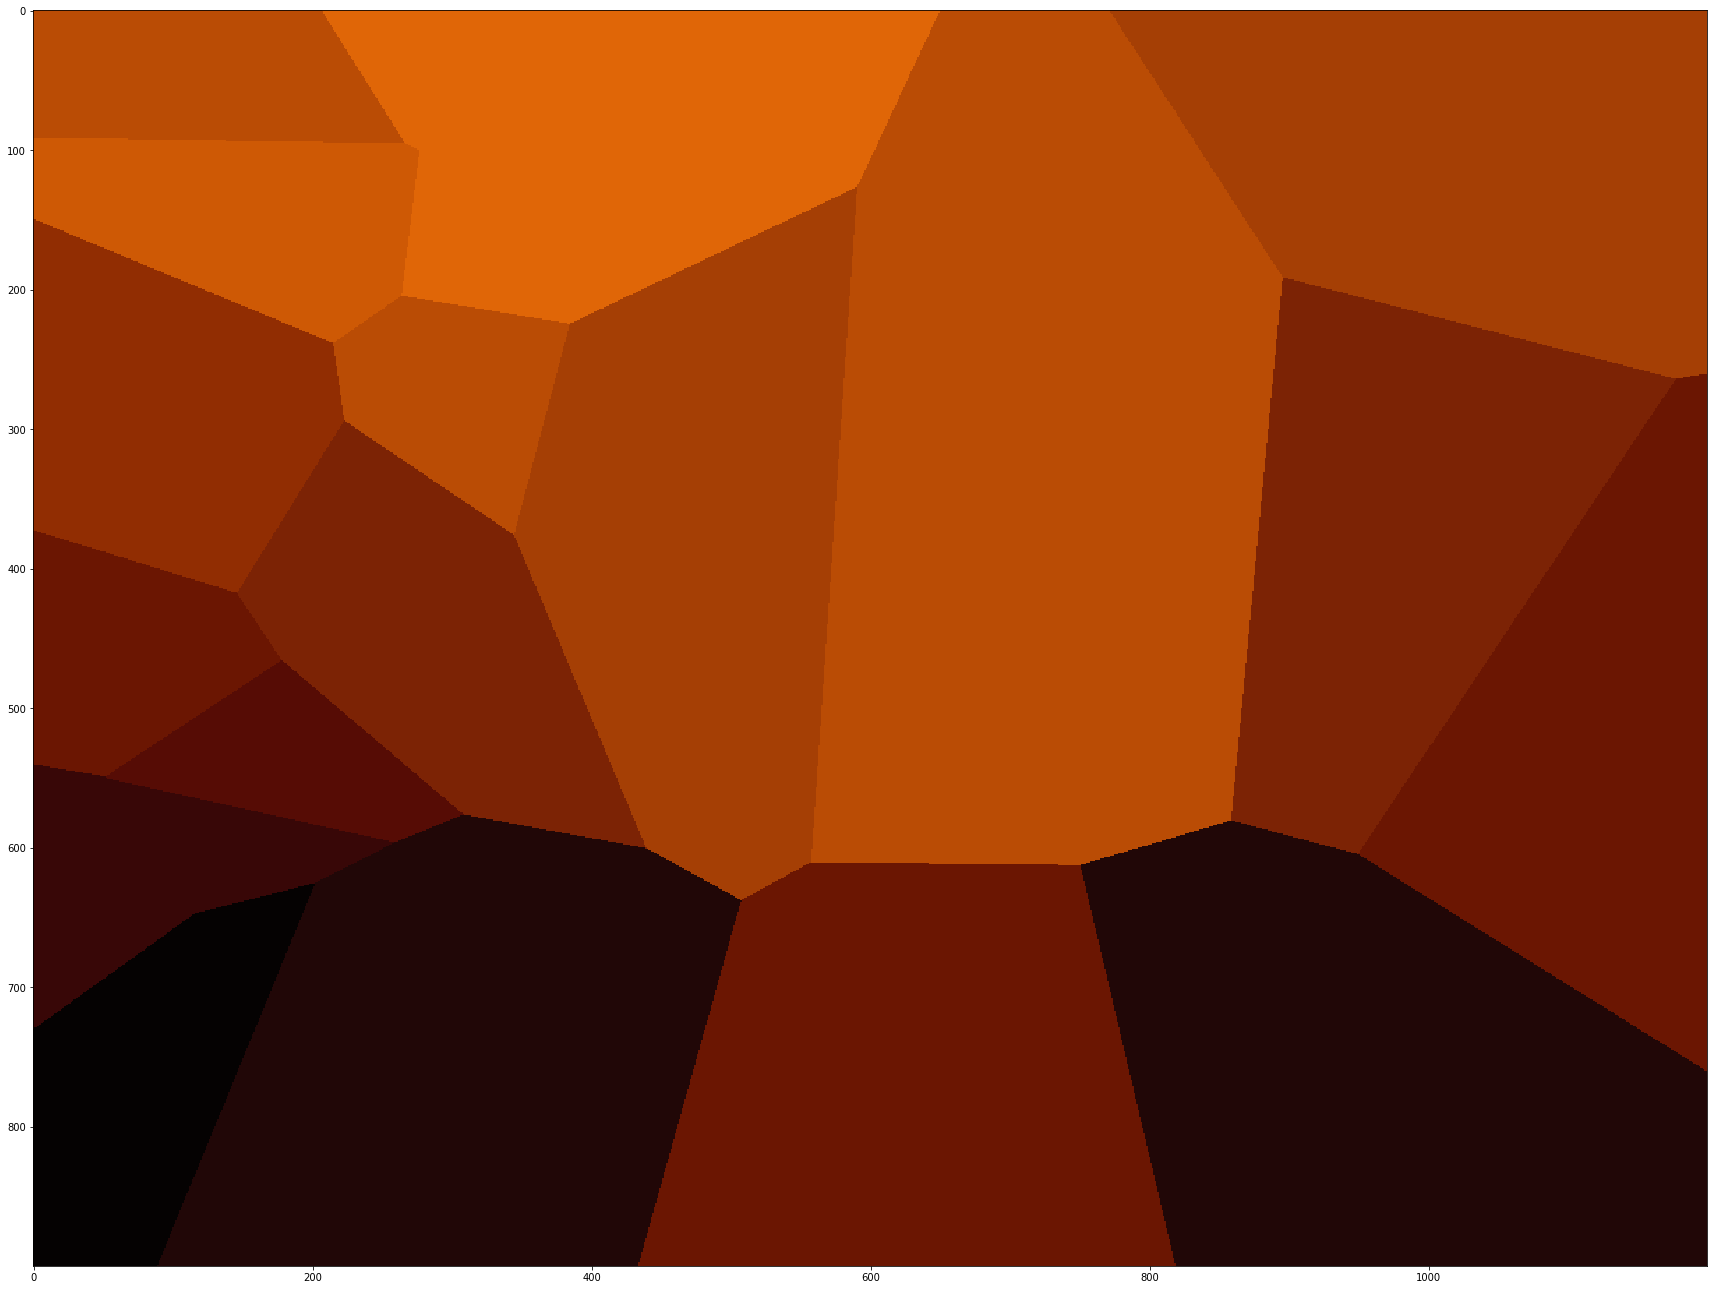

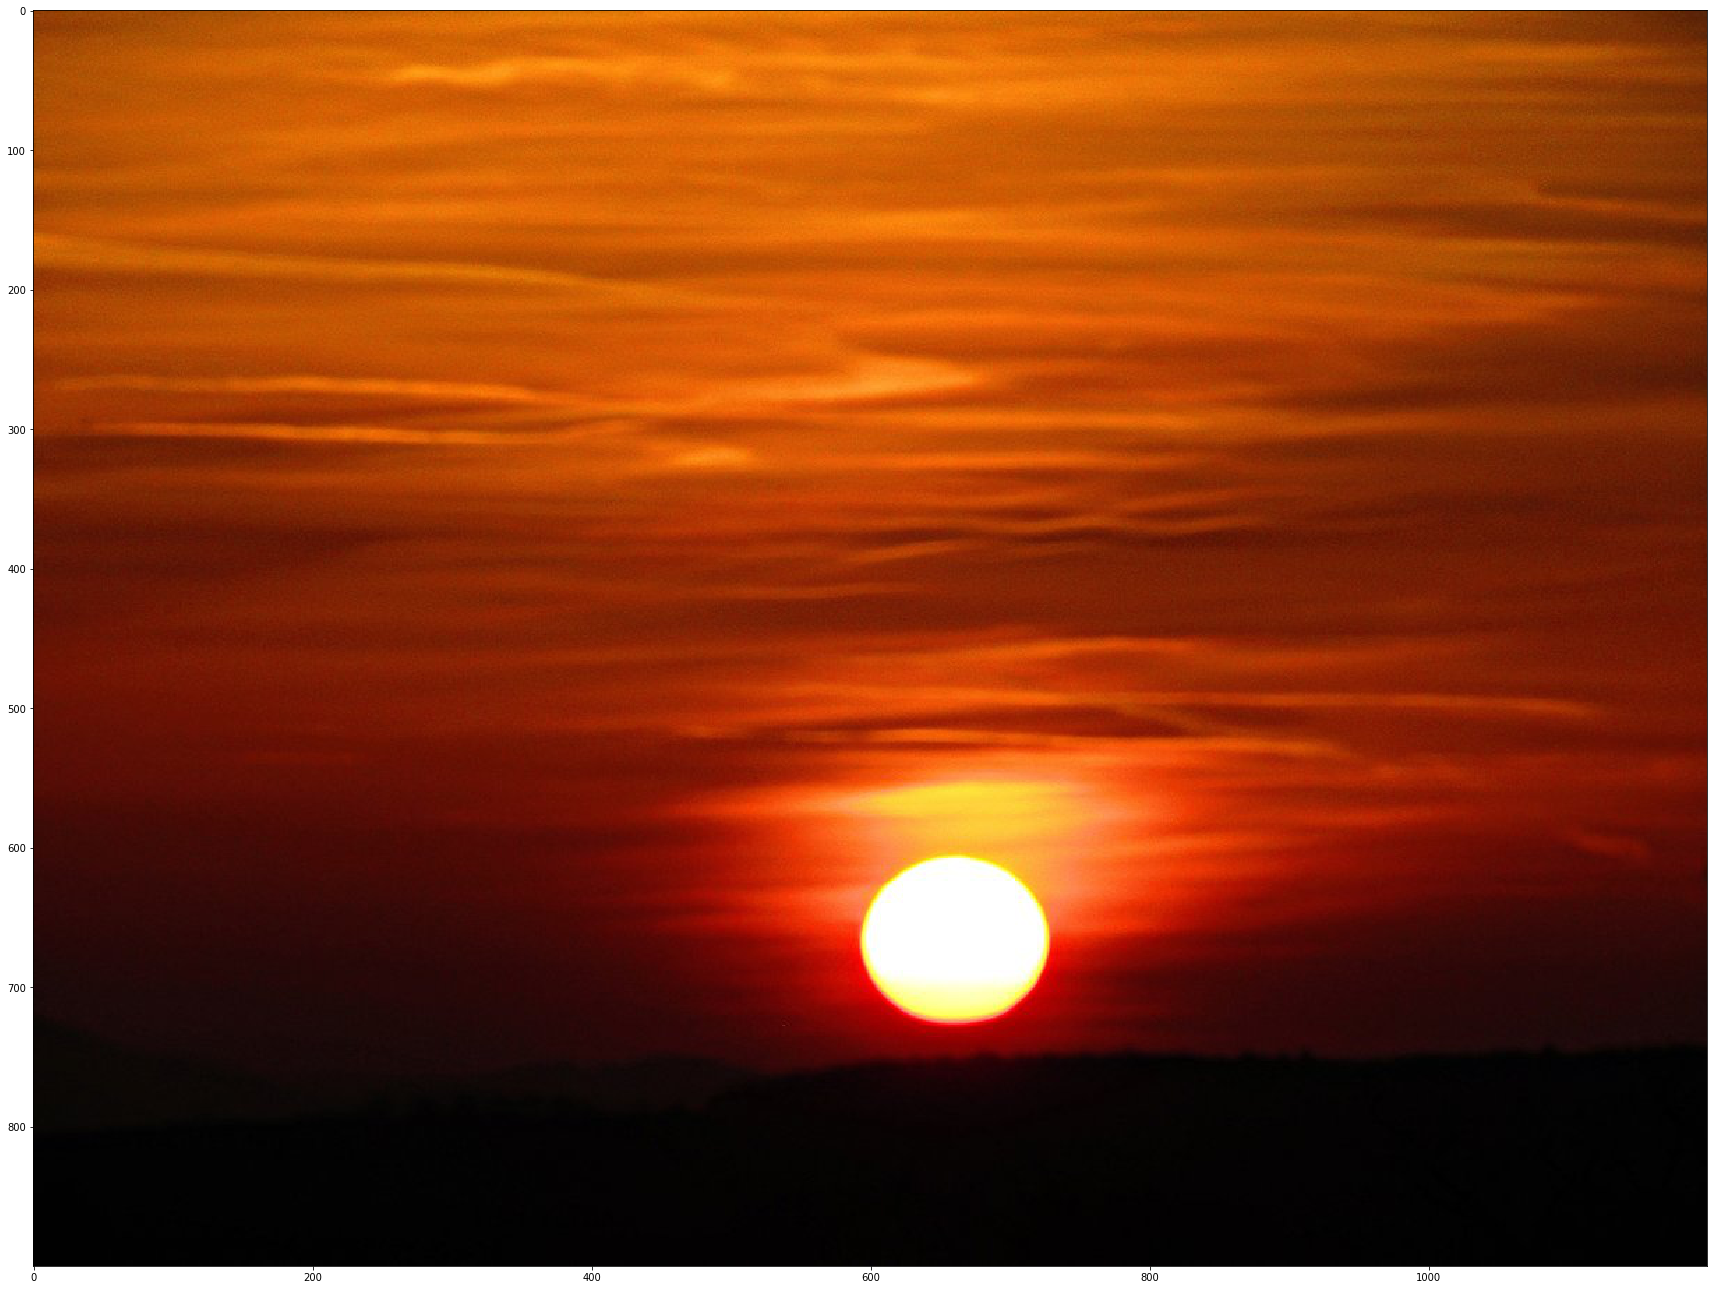

In [65]:
img = io.imread("https://media04.meinbezirk.at/imagepost/2019/02/19/7/63807_XL.jpg?1550601994")
n_points = 20
n_colors = 20
all_points, color_per_zone = show_result(img)

In [46]:
img.shape

(380, 675, 3)

Computing line equations
Plotting segments
[-4.19372238  2.72262605]
[-1.92001285  4.61666012]
[4.26300626 2.61281029]
[-1.24104733  4.84353193]
[4.97753484 0.47344162]
[-0.07517947  4.99943477]
[2.87315211 4.09206512]
[-2.80499705  4.13908101]
[-4.94601731  0.73274331]
[4.61987797 1.91225718]
[-0.9077374  4.9169109]
[1.25283438 4.84049646]
[2.23606798 4.47213595]
[1.44502296 4.78663855]
[-1.26434713  4.83750208]
[-4.1738634   2.75297373]
[-1.48199607  4.77532068]
[4.98837062 0.34082035]
[-4.60426356  1.94955304]
[4.8370505  1.26607362]
[-2.4171135   4.37693526]
[0.93556054 4.91169283]
[4.15271996 2.78476515]
[-2.64232867  4.24477316]
[-2.42821466  4.37078638]
[-4.23492172  2.65808917]
[-0.05208051  4.99972875]
[4.81039186 1.36386589]
[-4.86439582  1.15656964]
[2.38141574 4.39645983]
[-3.24423087  3.80459802]
[1.84024226 4.64903307]
[-1.06706999  4.88480927]
[2.75051659 4.17548302]
[4.5281575  2.12032772]
[4.96064489 0.62610081]
[-0.82199494  4.93196962]
[2.14796617 4.51511255]
[2.7414

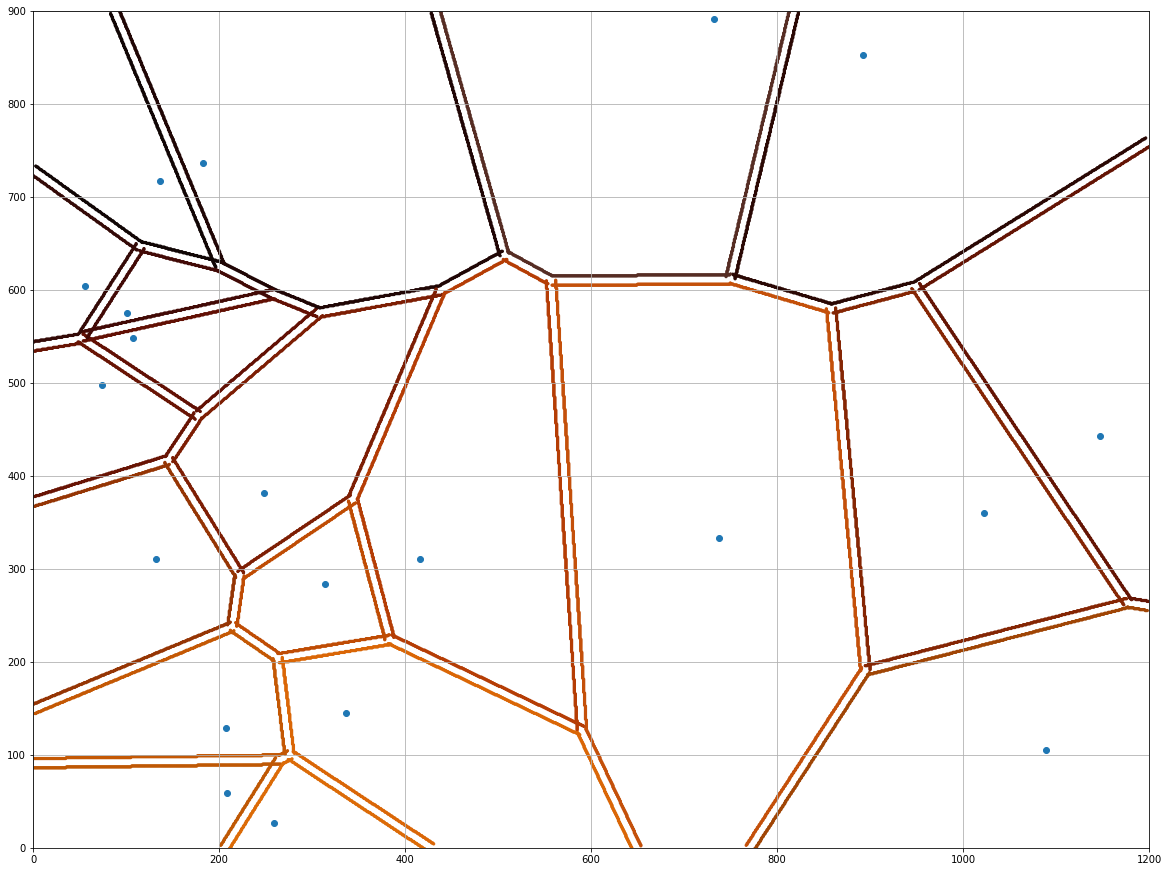

In [125]:
colors_dict = {i : (c[0] / 255., c[1] / 255., c[2] / 255., 1) for i, c in enumerate(color_per_zone)}

fig, ax = plt.subplots()
plot_cell_boundaries(all_points, img.shape[1], img.shape[0], colors_dict, ax, line_width=5)

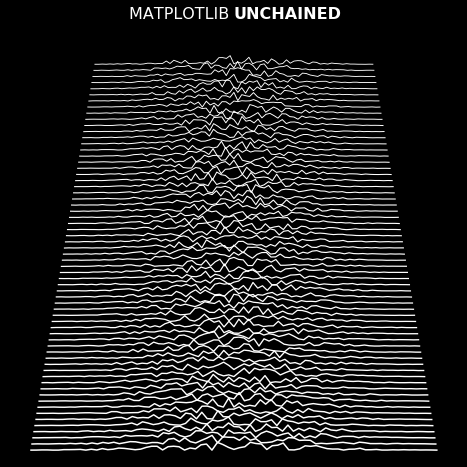

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes,
        ha="right", va="bottom", color="w",
        family="sans-serif", fontweight="light", fontsize=16)
ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes,
        ha="left", va="bottom", color="w",
        family="sans-serif", fontweight="bold", fontsize=16)


def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]

    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))

    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])

    # Return modified artists
    return lines

# Construct the animation, using the update function as the animation director.
anim = animation.FuncAnimation(fig, update, interval=10, frames=100, blit=True)
HTML(anim.to_html5_video())
plt.show()




In [82]:
from IPython.display import HTML
from matplotlib import animation, rc
rc('animation', html='html5')


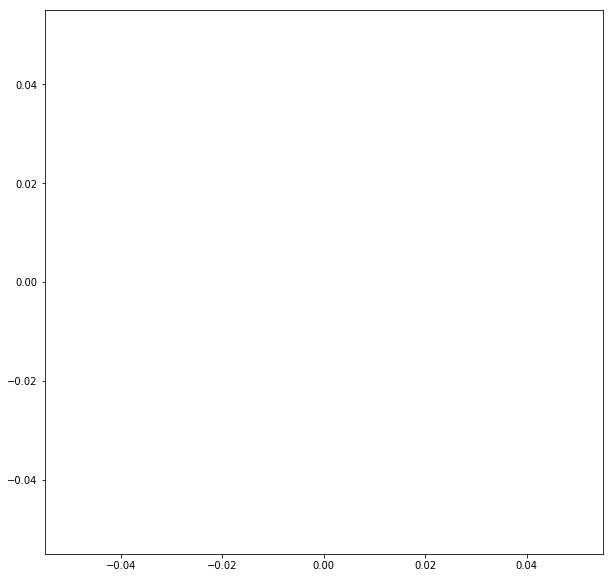

In [103]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

fig, ax = plt.subplots()

#ax.set_xlim(( 0, 2))
#ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, update, init_func=init,
                               frames=100, interval=20, blit=True)

# Optimized way to find voronoi boundaries

In [146]:
# Center growing method

def growing_centers(centers, x_max, y_max):
    # value def
    n_centers = len(centers)
    
    # Format is x, y
    belonging = -np.ones((x_max, y_max))
    
    boundaries = defaultdict(list)
    
    for i in range(n_centers):
        point = centers[i]
        belonging[point[0], point[1]] = i
        boundaries[i].append(point)
        
    def neighbourhood(point, x_max, y_max):
        is_in_img = lambda p: 0 <= p[0] < x_max and 0 <= p[1] < y_max
        left_point = point[0] - 1, point[1]
        right_point = point[0] + 1, point[1]
        top_point = point[0], point[1] + 1
        bot_point = point[0], point[1] - 1
        points = [left_point, right_point, top_point, bot_point]
        for p in points:
            if is_in_img(p):
                yield p
                
    while any([len(boundaries[i]) > 0 for i in range(n_centers)]):
        for i in range(n_centers):
            new_boundary = list()
            for boundary_point in boundaries[i]:
                for p in neighbourhood(boundary_point, x_max, y_max):
                    if belonging[p[0], p[1]] < 0:
                        new_boundary.append(p)
                        belonging[p[0], p[1]] = i
            boundaries[i] = new_boundary
              
    return belonging
        
    

In [147]:
x_max = 100
y_max=  100
growing_centers([(0, 0), (99, 99)], x_max, y_max)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])